In [6]:
from fbprophet import Prophet

# prophet을 사용하기 위해서는 다음과 같이 피처의 이름을 변경해야 합니다 : 'ds', 'y'
# bitcoin_df = pd.read_csv(file_path, names=['ds', 'y'])
prophet = Prophet(seasonality_mode='multiplicative', 
                  yearly_seasonality=True,
                  weekly_seasonality=True, daily_seasonality=True,
                  changepoint_prior_scale=0.5)
# prophet.fit(bitcoin_df)
# [출처] [Python Data Analysis 분석 8] 데이터 분석 - 파이썬 시계열분석|작성자 뭉다



In [7]:
prophet

In [33]:
import pandas as pd

sale_df21 = pd.read_csv('./영업수주_2021_1년.csv', index_col=0)
sale_df21=sale_df21[['수주금액','수주일자','납기일자']]

In [34]:
sale_df21=sale_df21[['수주일자','수주금액']]
sale_df21=sale_df21.rename({'수주일자':'ds'}, axis=1)

In [35]:
sale_df21['ds'] = pd.to_datetime(sale_df21['ds'])

In [36]:
sale_df21=sale_df21[(sale_df21['ds'] > '2021-02-21')&(sale_df21['ds'] < '2021-04-21')]

In [37]:
sale_df21=sale_df21.rename({'수주금액':"y"}, axis=1)

In [62]:
sale_df21

,ds,y
0,2021-02-22,15000000
1,2021-02-22,20020000
2,2021-02-22,2004000
3,2021-02-22,10030000
4,2021-02-22,10040000
...,...,...
1670,2021-04-20,13350000
1671,2021-04-20,26710000
1672,2021-04-20,16032000
1673,2021-04-20,13365000


In [38]:
prophet.fit(sale_df21)

C:\Users\admin\Anaconda3\envs\cakd7\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [59]:
future_data = prophet.make_future_dataframe(periods=120, freq='d')
forecast_data = prophet.predict(future_data)
forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(5)


C:\Users\admin\Anaconda3\envs\cakd7\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\admin\Anaconda3\envs\cakd7\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,yhat,yhat_lower,yhat_upper
165,2021-08-14,1.116288e+08,5.090300e+07,1.768089e+08
166,2021-08-15,1.144910e+08,5.116794e+07,1.820657e+08
167,2021-08-16,1.111468e+08,4.566812e+07,1.781243e+08
168,2021-08-17,1.228815e+08,5.178878e+07,1.958759e+08
169,2021-08-18,1.307256e+08,5.636397e+07,2.105578e+08


In [60]:
forecast_data

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,daily,daily_lower,daily_upper,multiplicative_terms,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2021-02-22,3.861131e+06,-1.980922e+06,1.788191e+07,3.861131e+06,3.861131e+06,1.858051,1.858051,1.858051,1.088425,...,-0.197908,-0.197908,-0.197908,-0.571718,-0.571718,-0.571718,0.0,0.0,0.0,8.063684e+06
1,2021-02-23,3.734339e+06,-1.764145e+05,1.867970e+07,3.734339e+06,3.734339e+06,1.858051,1.858051,1.858051,1.474561,...,0.077998,0.077998,0.077998,-0.461488,-0.461488,-0.461488,0.0,0.0,0.0,9.240850e+06
2,2021-02-24,3.607547e+06,7.716466e+04,1.955488e+07,3.607547e+06,3.607547e+06,1.858051,1.858051,1.858051,1.798450,...,0.265636,0.265636,0.265636,-0.325237,-0.325237,-0.325237,0.0,0.0,0.0,1.009554e+07
3,2021-02-25,3.480756e+06,-3.687395e+05,1.812362e+07,3.480756e+06,3.480756e+06,1.858051,1.858051,1.858051,1.613081,...,-0.080944,-0.080944,-0.080944,-0.164027,-0.164027,-0.164027,0.0,0.0,0.0,9.095496e+06
4,2021-02-26,3.353964e+06,6.055207e+05,2.014474e+07,3.353964e+06,3.353964e+06,1.858051,1.858051,1.858051,2.193716,...,0.315143,0.315143,0.315143,0.020522,0.020522,0.020522,0.0,0.0,0.0,1.071161e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,2021-08-14,4.541625e+07,5.090300e+07,1.768089e+08,2.046709e+07,7.181728e+07,1.858051,1.858051,1.858051,1.457905,...,-0.232256,-0.232256,-0.232256,-0.167889,-0.167889,-0.167889,0.0,0.0,0.0,1.116288e+08
166,2021-08-15,4.571697e+07,5.116794e+07,1.820657e+08,2.040336e+07,7.246331e+07,1.858051,1.858051,1.858051,1.504343,...,-0.147669,-0.147669,-0.147669,-0.206039,-0.206039,-0.206039,0.0,0.0,0.0,1.144910e+08
167,2021-08-16,4.601770e+07,4.566812e+07,1.781243e+08,2.038161e+07,7.312319e+07,1.858051,1.858051,1.858051,1.415306,...,-0.197908,-0.197908,-0.197908,-0.244837,-0.244837,-0.244837,0.0,0.0,0.0,1.111468e+08
168,2021-08-17,4.631843e+07,5.178878e+07,1.958759e+08,2.035275e+07,7.383804e+07,1.858051,1.858051,1.858051,1.652973,...,0.077998,0.077998,0.077998,-0.283076,-0.283076,-0.283076,0.0,0.0,0.0,1.228815e+08


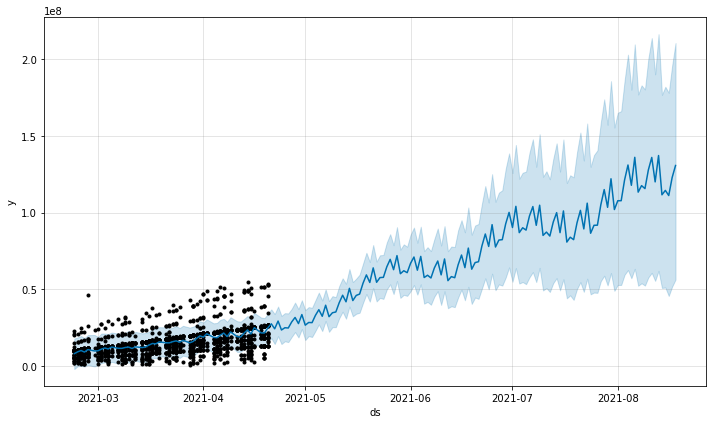

In [61]:
import matplotlib.pyplot as plt


fig1 = prophet.plot(forecast_data)


C:\Users\admin\Anaconda3\envs\cakd7\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\admin\Anaconda3\envs\cakd7\lib\site-packages\fbprophet\plot.py:422: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)
C:\Users\admin\Anaconda3\envs\cakd7\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\admin\Anaconda3\envs\cakd7\lib\site-packages\fbprophet\plot.py:422: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)
C:\Users\admin\Anaconda3\envs\cakd7\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.ap

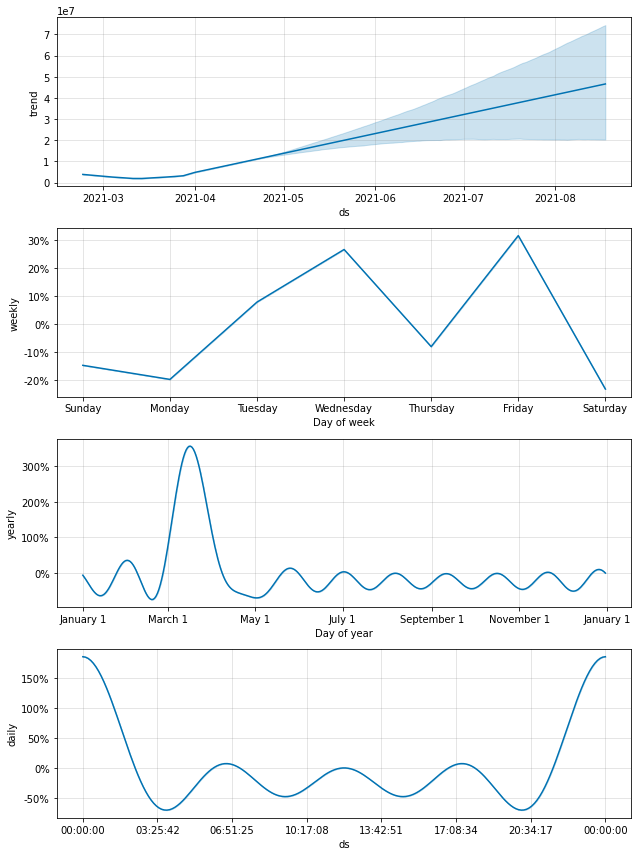

In [63]:
fig2 = prophet.plot_components(forecast_data)



3861131.0